# Story: DataByteSun Consulting Assists Surprise Housing

____________

# Introduction
In the vibrant city of Sydney, **Surprise Housing**, a leading US-based housing company, was gearing up to enter the Australian market. Renowned for its data-driven strategy of purchasing undervalued properties and flipping them for profit, the company faced a crucial challenge: understanding local pricing dynamics. To navigate this new landscape, they turned to DataByteSun for expert data analytics support.

# The Challenge
Surprise Housing recognized the need to leverage data for informed investment decisions. They had compiled a comprehensive dataset from past property sales across Australia but required a reliable method to predict the actual values of prospective properties. They tasked DataByteSun with building a regression model that would highlight key factors influencing house prices.

<span style="font-family: 'Courier New'; font-size: 18px;">=> They tasked DataByteSun with building a regression model that would highlight key factors influencing house prices. </span>


<span style="font-family: 'Courier New'; font-size: 22px;"> Dataset: House Price Prediction </span><br>
<span style="font-family: 'Courier New'; font-size: 14px;"> Link: https://www.kaggle.com/datasets/srikanthladda/house-price-prediction </span>

_________________________
_________________________

# The Task
The team at DataByteSun took on the challenge of developing a robust regression model using regularization techniques, specifically ridge and lasso regression. Their objectives included:
1. **Identify Significant Variables:** Determine which independent variables significantly impacted house prices.
2. **Assess Model Performance:** Evaluate how well these variables explained the variations in property prices.
3. **Optimize Lambda Values:** Establish the optimal value of lambda for both ridge and lasso regression to enhance model accuracy.

# Business Goal
By modeling house prices with the available independent variables, DataByteSun aimed to provide Surprise Housing with valuable insights into the pricing dynamics of the Australian market. This analysis would empower the management team to refine their investment strategy, focusing on areas with the highest potential returns. Ultimately, DataByteSun's expertise would help ensure a successful market entry for Surprise Housing, aligning with their growth objectives. 

____________________
____________________

## - Required Libraries 

In [39]:
# Import all required Libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

## - Data Source

In [40]:
# Shows first 5 rows of data
pd.set_option('display.max_columns', None)  #show all columns
pd.set_option('display.max_rows', None)  #show all columns

data = pd.read_csv('../Datasets/House_Price.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## - Data Exploration 

In [3]:
# List of features and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
   Tthere are total of 1460 record with  81 features where 3 are of float, 35 are integer, and 43 are objects. Some of them contain null values.
</di>


In [4]:
# describe only useful for numerical features
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- **count:** The number of non-null values in each feature. Most features have 1460 non-null values, but some features like LotFrontage have fewer non-null values (1201).
- **mean:** The average value for each feature across all records. For example, the mean of OverallQual is about 6.1, which suggests that, on average, houses in the dataset have a quality rating between "Good" and "Very Good" (on a scale of 1 to 10)
- **std (Standard Deviation):** Measures the variation or spread of the data. A higher value means the data is more spread out. For example, the LotArea has a large standard deviation (9981), meaning there is significant variation in the lot sizes across the dataset.
- **min:** The minimum value for each feature. For example, the minimum value of YearBuilt is 1872, indicating that the oldest house in the dataset was built in 1872.
- **25% (25th Percentile or Q1):** The value below which 25% of the data falls. For LotFrontage, 25% of houses have a frontage of 59 feet or less.
- **50% (Median or Q2):** The middle value of the feature. For example, the median of GrLivArea is 1464 square feet, meaning half of the houses have a living area smaller than 1464 square feet and half have a larger area.
- **75% (75th Percentile or Q3):** The value below which 75% of the data falls. For GarageArea, 75% of houses have a garage area less than or equal to 576 square feet.
- **max:** The maximum value for each feature. For example, the maximum sale price (SalePrice) is $755,000.

## - Data Cleaning

In [5]:
data = data.drop_duplicates()
data.shape

(1460, 81)

<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
    There are no duplicate records in the dataset, as the count remains at 1460 even after attempting to drop duplicates.
</div>

#### -- Treat NULL Values

In [6]:
# Function to return columns with null values
def columns_with_missing_values():
    total = data.isnull().sum().sort_values(ascending=False)
    percent = round(data.isnull().sum()*100/len(data), 2).sort_values(ascending=False)
    
    all_features = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    all_features = all_features[all_features.Total != 0]
    
    if len(all_features) == 0:
        return 'No Column with Missing Values.'
    return all_features
   
# Printing columns with null values for object datatype
print('Columns with missing values:')
columns_with_missing_values()

Columns with missing values:


,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageQual,81,5.55
GarageFinish,81,5.55
GarageType,81,5.55


##### Drop Columns with Too Many Missing Values (Above 90%)

In [7]:
data.drop(columns = ['PoolQC','MiscFeature','Alley'], axis = 1, inplace = True)
data.shape

(1460, 78)

##### For Fence, MasVnrType, FireplaceQu will impute 'No'

In [8]:
data.fillna({'Fence':'None','MasVnrType':'None','FireplaceQu':'None'}, inplace = True)

##### For Garage fill missing with None

In [9]:
data.fillna({'GarageType':'None', 'GarageCond':'None','GarageQual':'None','GarageFinish':'None'}, inplace = True)

##### For Basement fill missing with None

In [10]:
data.fillna({'BsmtFinType2':'None','BsmtExposure':'No','BsmtFinType1':'None','BsmtQual':'None','BsmtCond':'None'}, inplace = True)

##### For electrical fill with mode

In [11]:
data.fillna({'Electrical': data['Electrical'].mode()[0]}, inplace = True)

In [12]:
# Printing columns with null values
columns_with_missing_values()

,Total,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55


##### Impute LotFrontage with median, Impute GarageYrBlt with mode, Impute MasVnrArea with 0.0 (assuming missing values mean no veneer)

In [13]:
data.fillna({'LotFrontage': data['LotFrontage'].median(), 'GarageYrBlt': data['GarageYrBlt'].mode()[0], 'MasVnrArea': 0.0}, inplace = True)

In [14]:
# Printing columns with null values
columns_with_missing_values()

'No Column with Missing Values.'

<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
    No Null value in dataset.
</div>

_________________________

## - Data Analysis

In [15]:
# Drop the Id column as not required
data.drop(columns = 'Id', inplace = True)

In [16]:
target_col = 'SalePrice'

In [17]:
# Seperate the Numerical columns
data_num = data.select_dtypes(include = ['float64','int64'])

print('Shape: ',data_num.shape)
data_num.head()

Shape:  (1460, 37)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


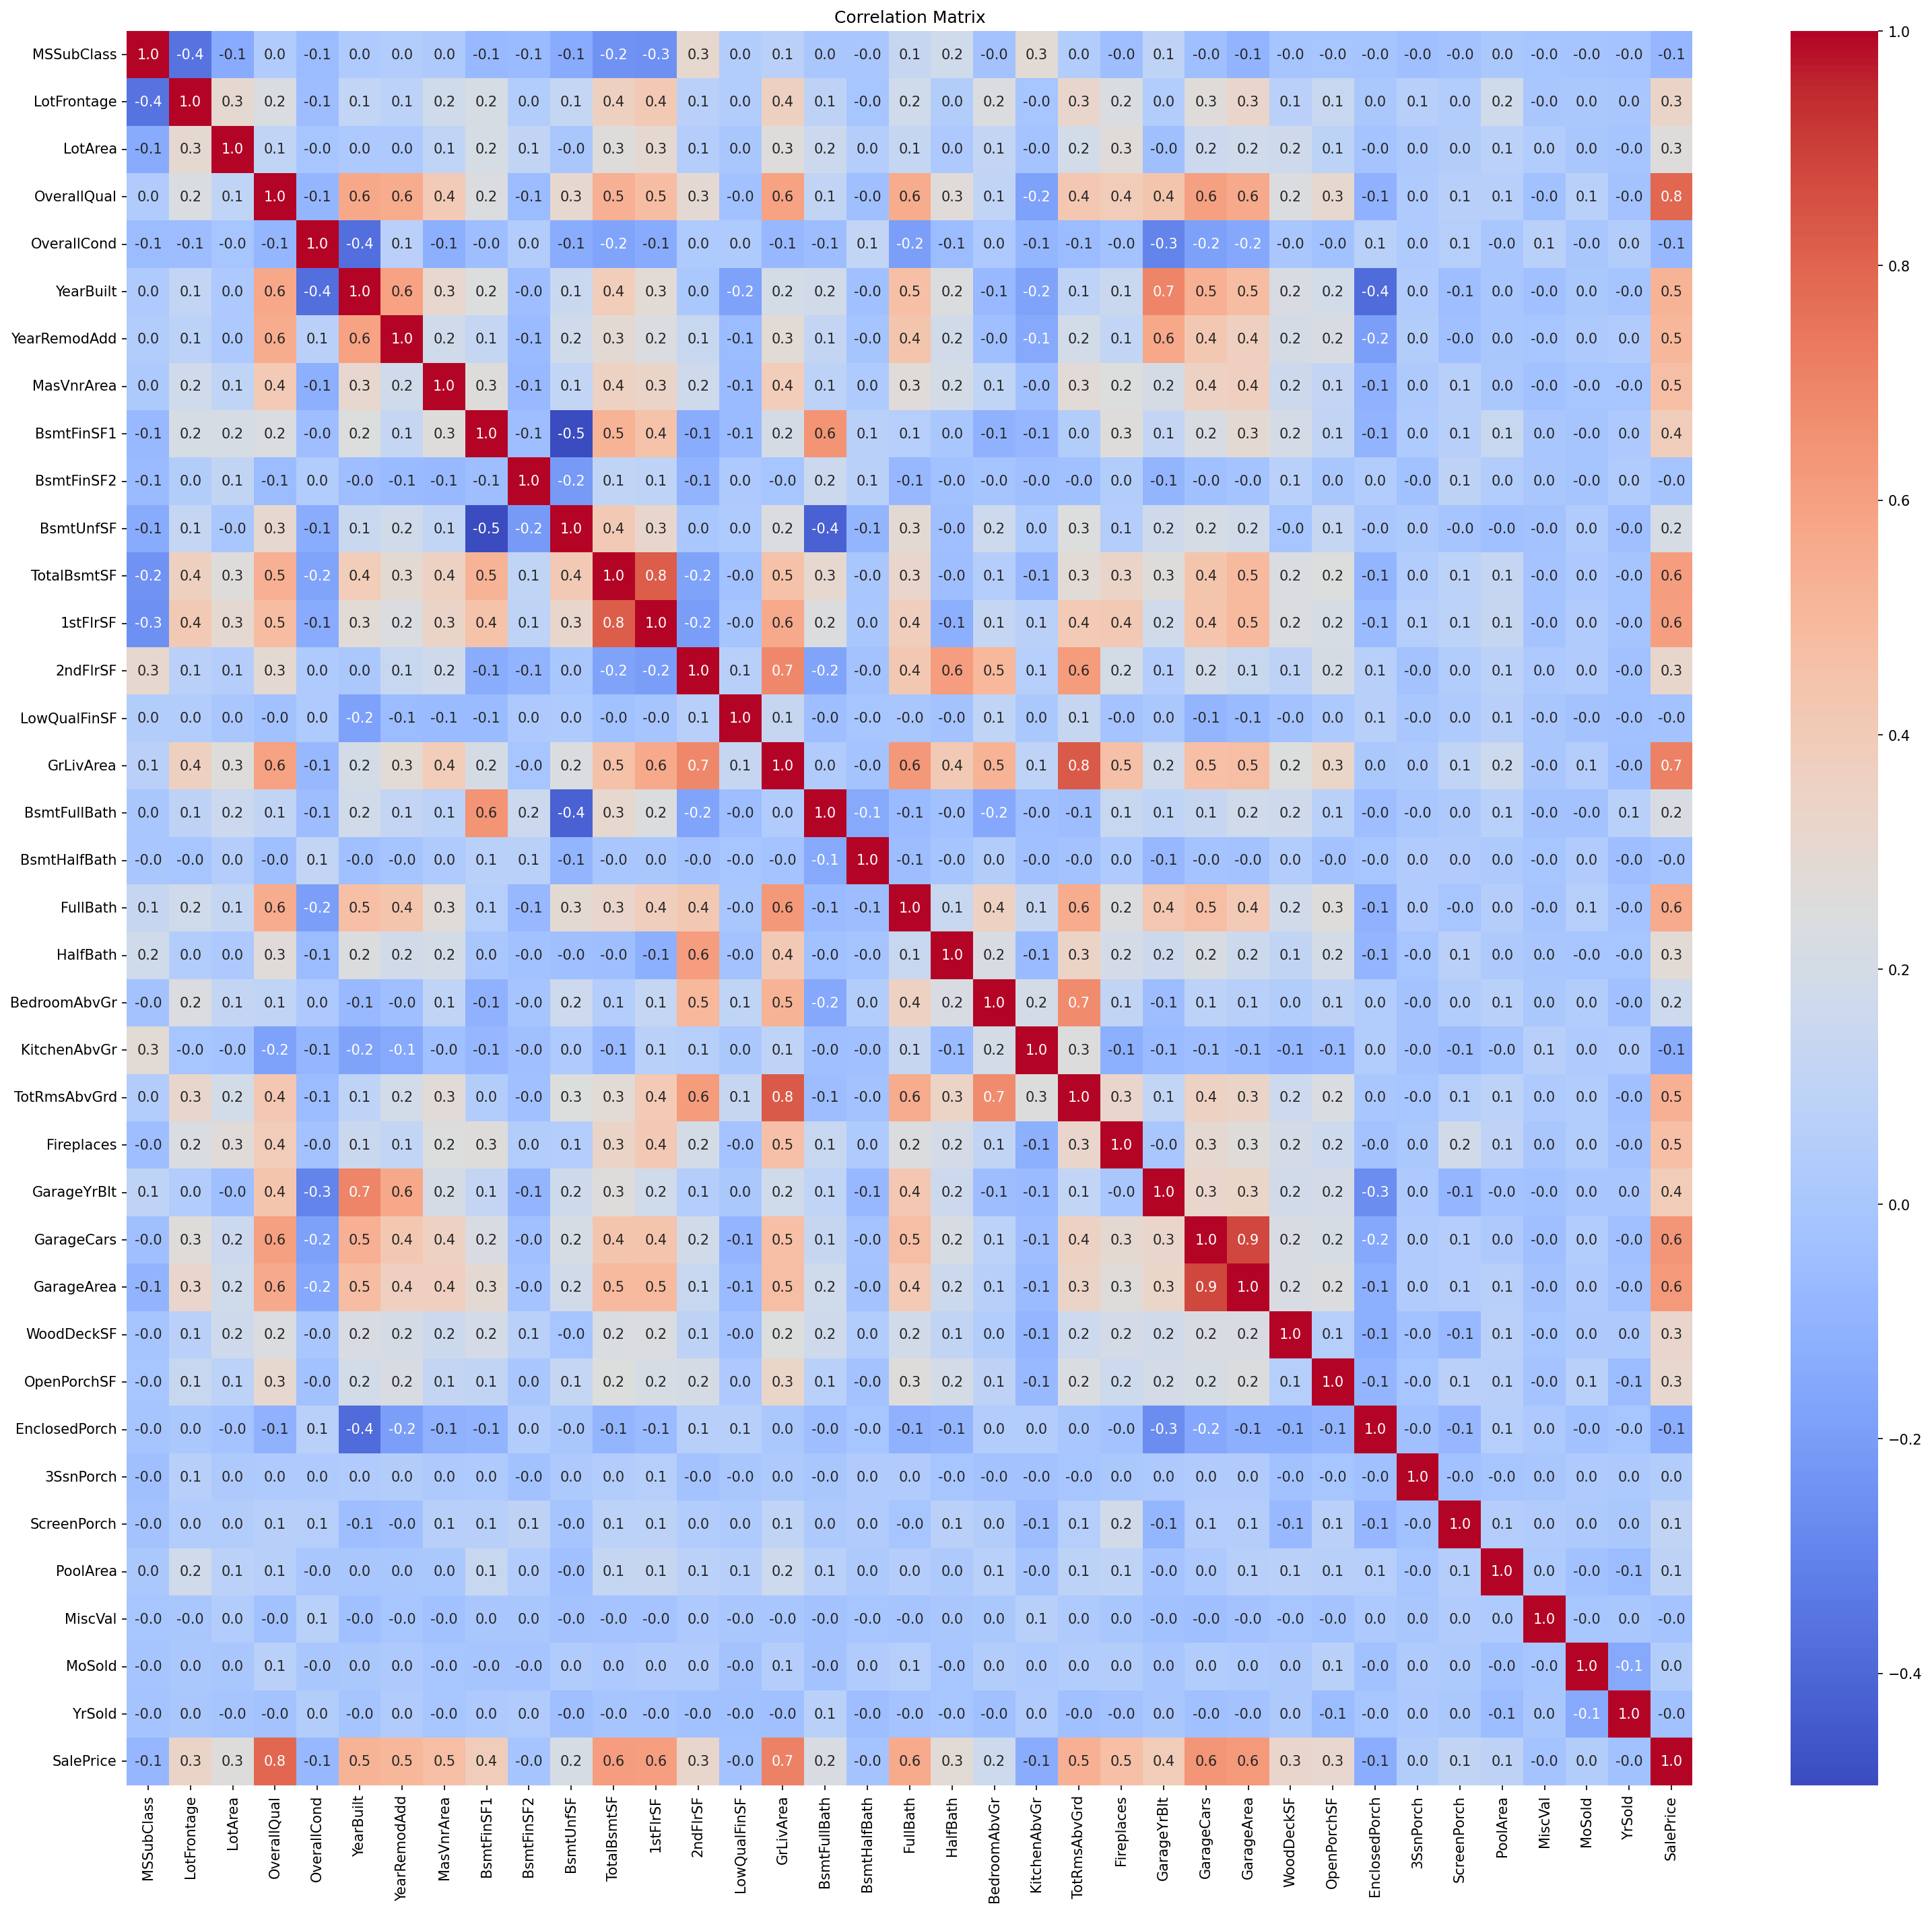

In [18]:
# Correlation Matrix
plt.figure(figsize=(25,23),dpi=150)
sns.heatmap(data_num.corr(), annot=True, cmap='coolwarm', fmt='.1f')

plt.title("Correlation Matrix")
plt.show()

<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
    No direct Visible Pattern.
</div>

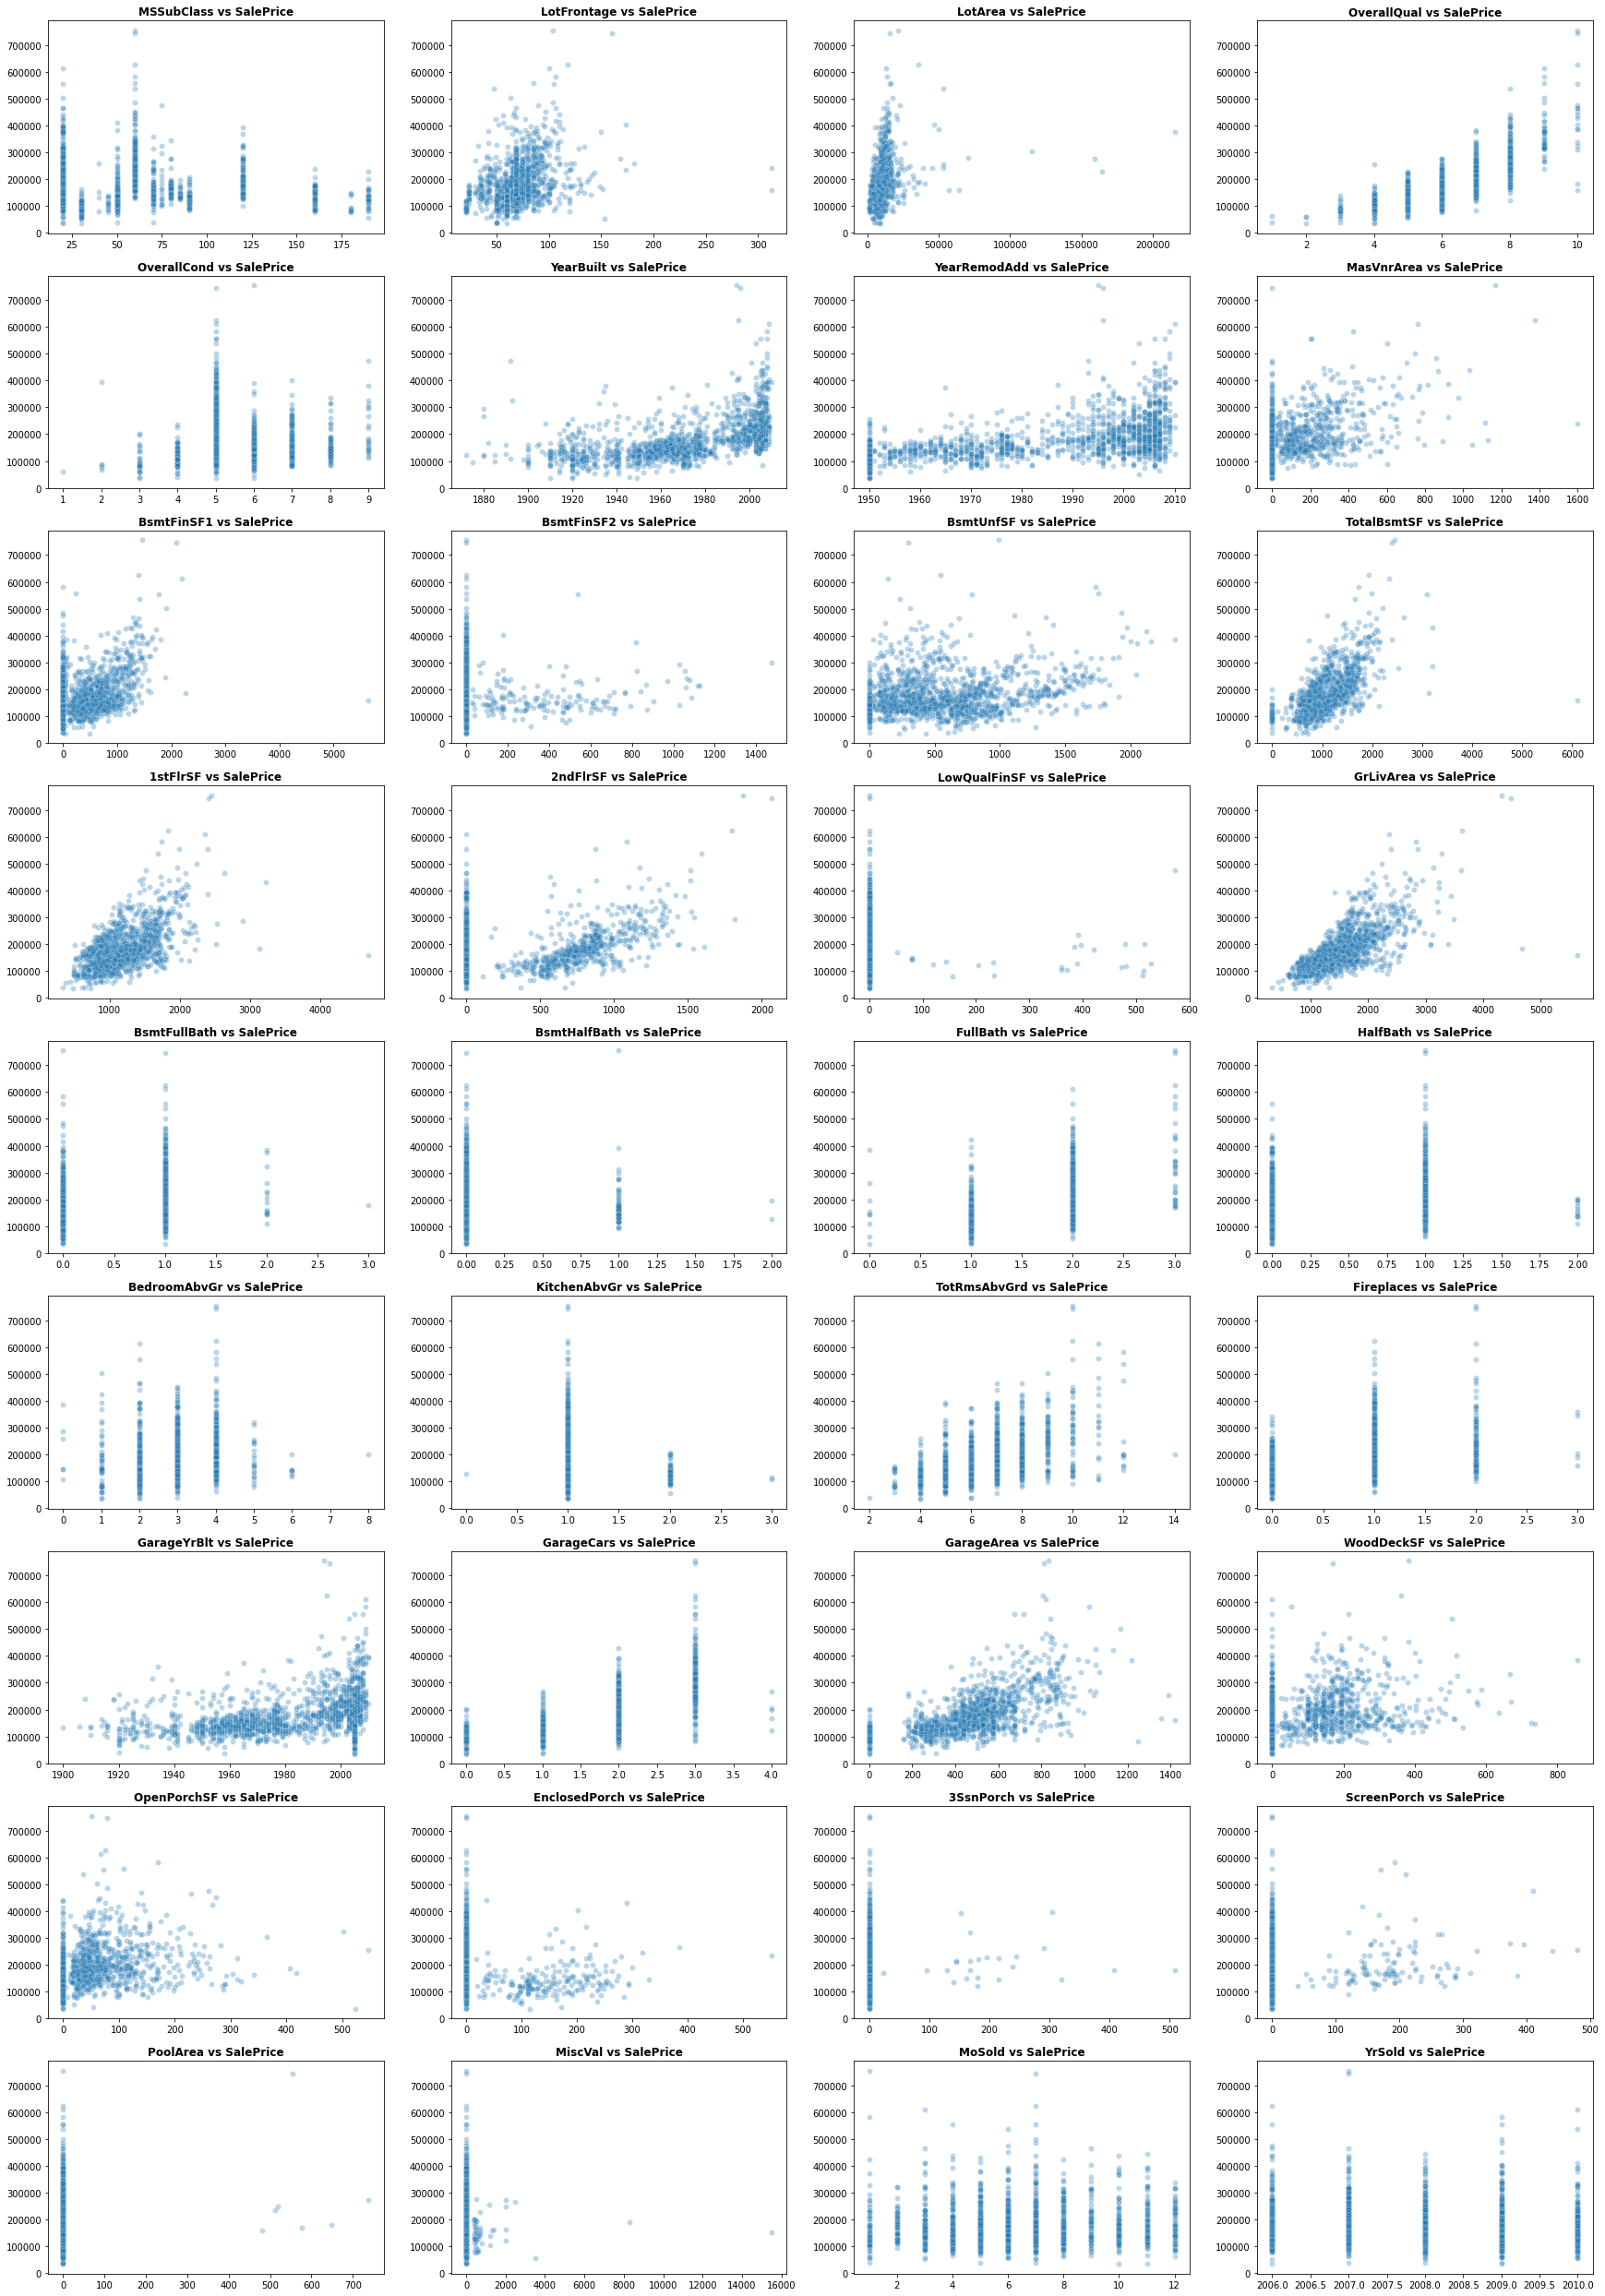

In [19]:
# Numerical column data analysis
plt.figure(figsize=(30, 50))

count = 1

for column in data_num.columns:
    if column != target_col:
        plt.subplot(10, 4, count)
        sns.scatterplot(x = data_num[column], y = data_num[target_col], alpha = 0.3).set(ylabel=None, xlabel=None)
        plt.title(column + " vs " + target_col, weight='bold')
        count += 1 
plt.show()

<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
    For some scatterplots, clear linear relationships appear between certain variable pairs. Some plots indicate non-linear relationships. Certain scatterplots show random dispersion, suggesting weak or no correlation between those variables
</div>

In [20]:
# Seperate the Object type columns
data_obj = data.select_dtypes(include = ['object'])
print('Shape: ',data_obj.shape)

data_num.head()

Shape:  (1460, 40)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


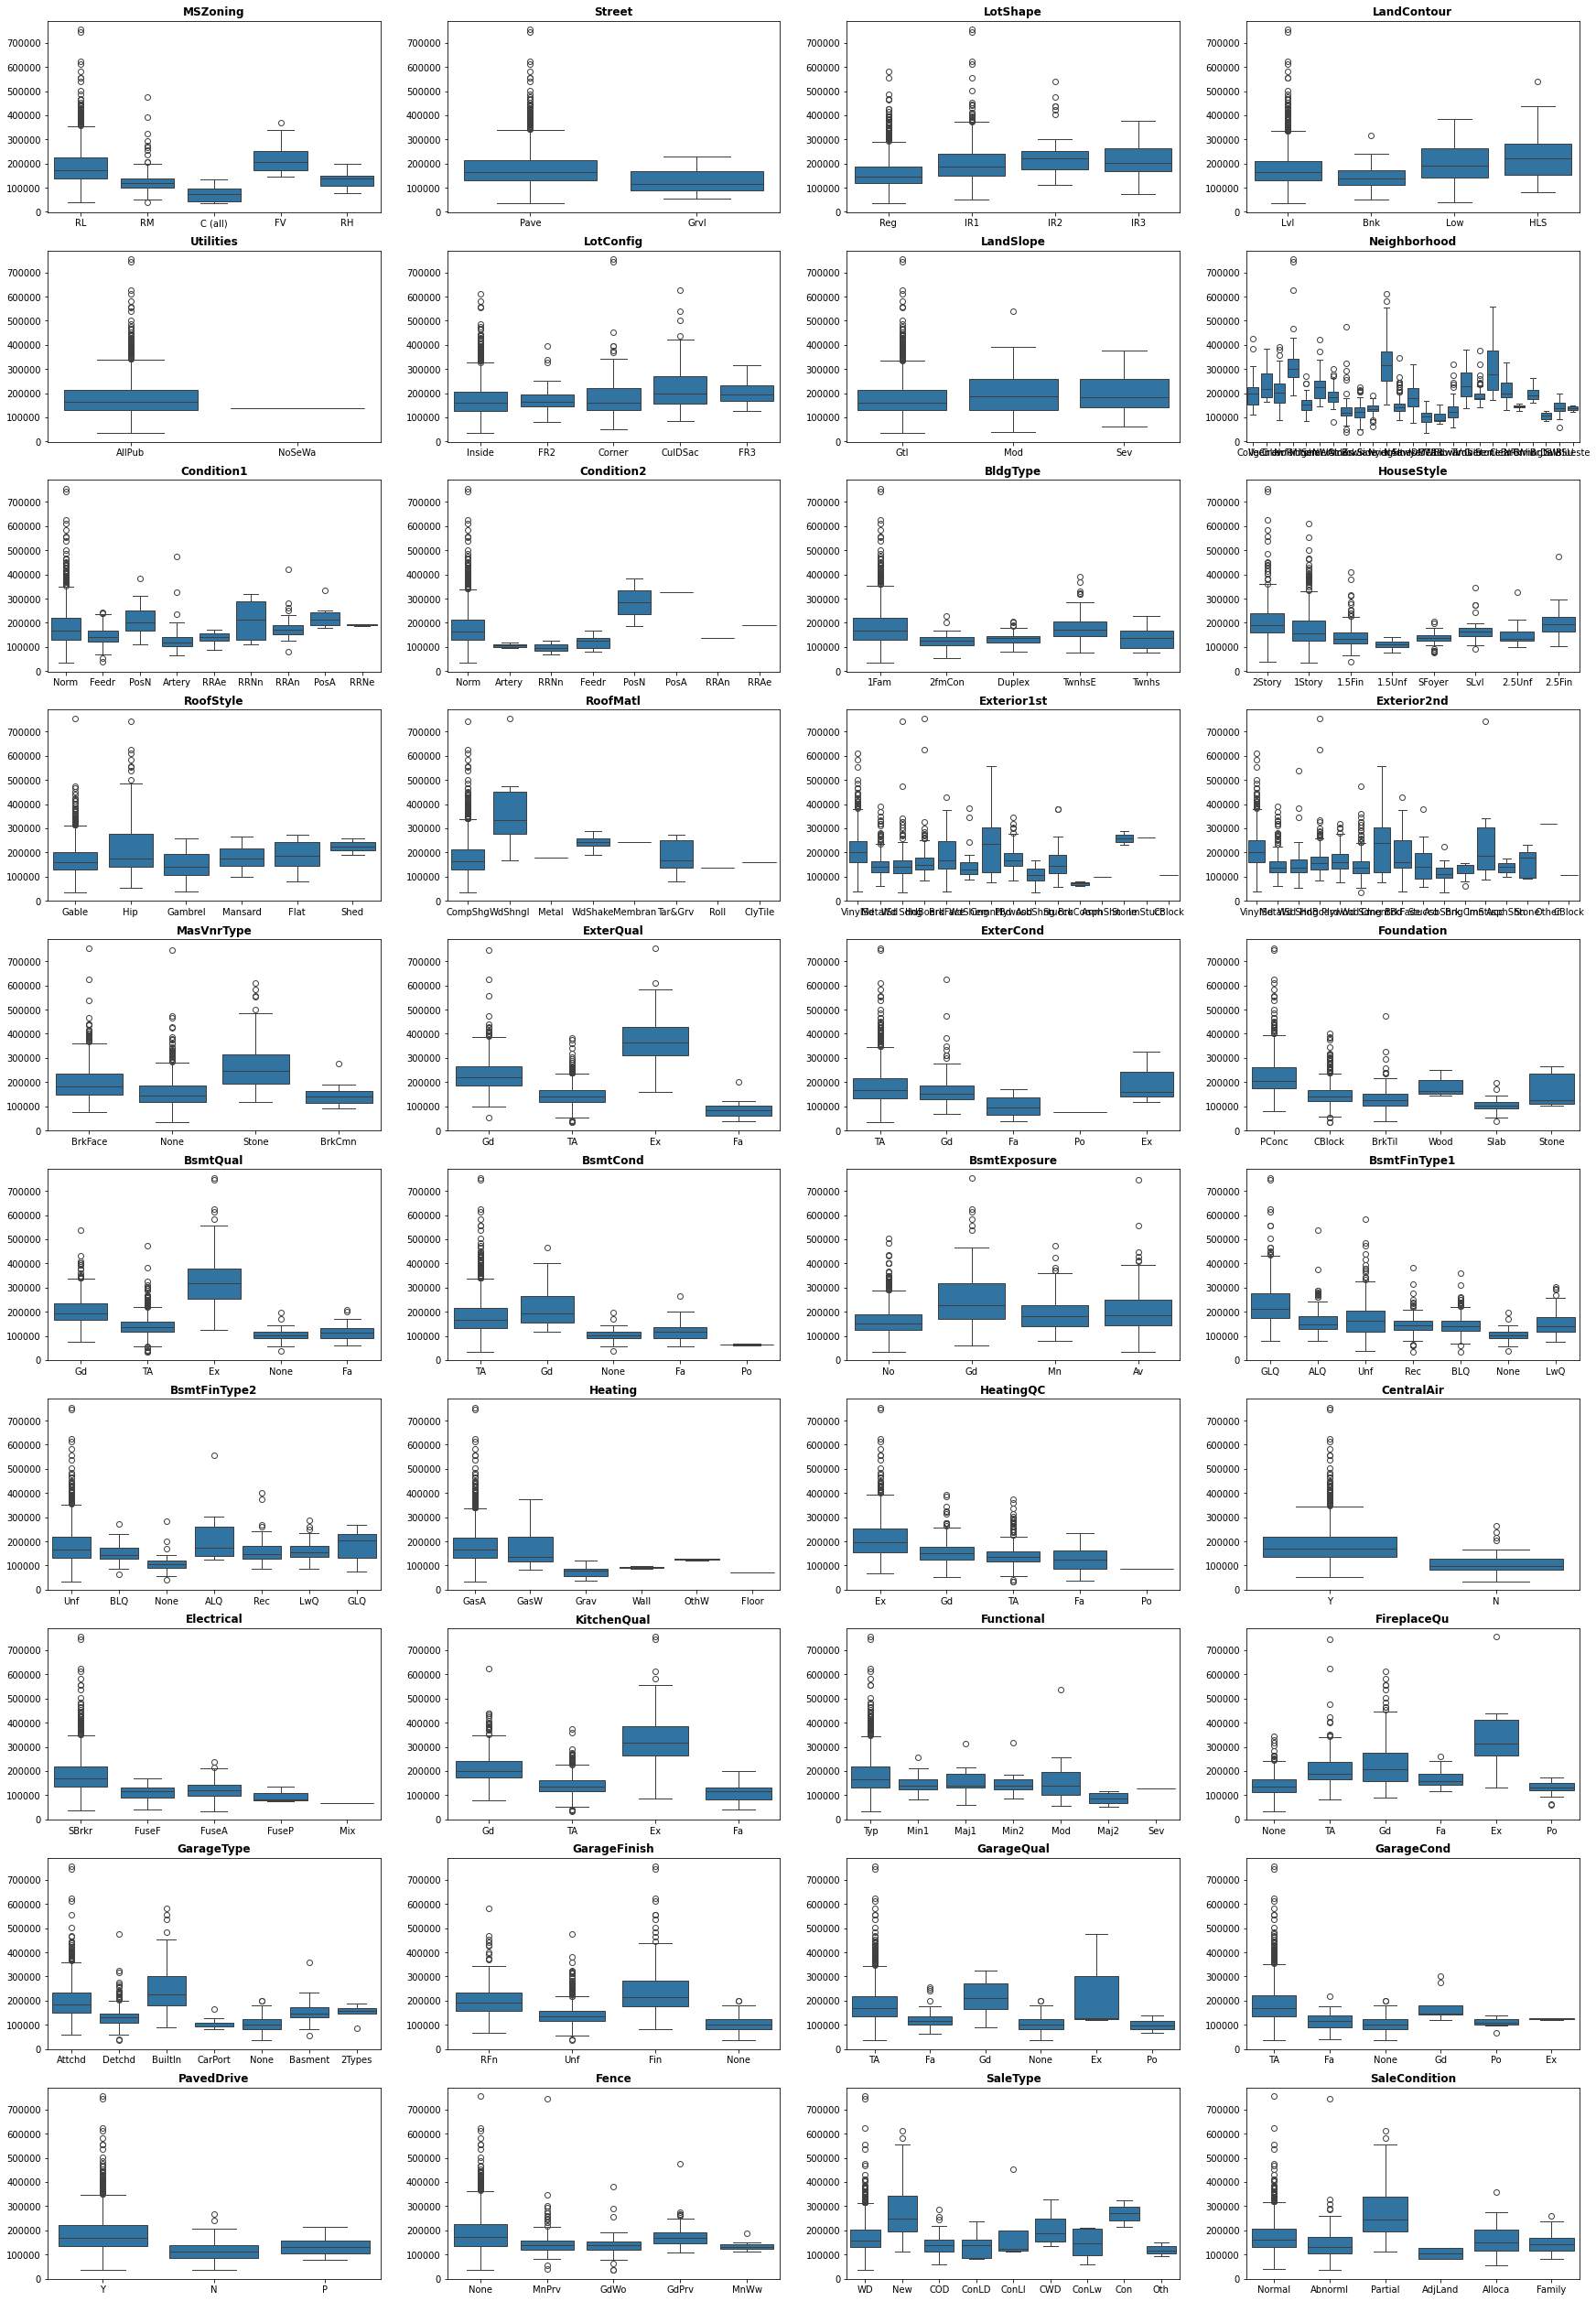

In [21]:
# Categorical column data analysis
plt.figure(figsize=(30, 50))

count = 1

for column in data_obj.columns:
    if column != target_col:
        plt.subplot(11, 4, count)
        sns.boxplot(x=data_obj[column], y=data_num[target_col]).set(ylabel=None, xlabel=None)
        plt.title(column, weight='bold')
        count += 1   
plt.show()

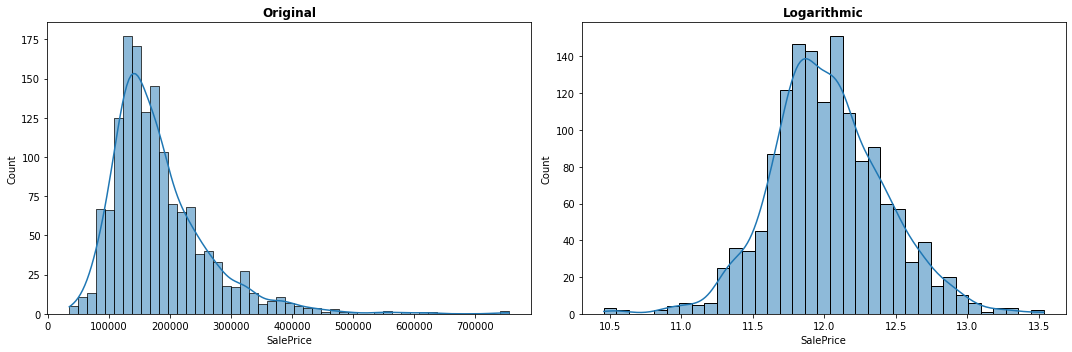

In [22]:
# Target variable data analysis
plt.figure(figsize=(15, 5))

target_data = data[target_col]

# Left plot: Original distribution
plt.subplot(1, 2, 1)
sns.histplot(target_data, kde=True) 
plt.title("Original", weight='bold')

# Right plot: Logarithmic transformation (ensure no negative or zero values)
plt.subplot(1, 2, 2)
# Applying np.log1p (log(1 + x)) to safely handle zeros
sns.histplot(np.log1p(target_data), kde=True)  # Use np.log1p for safe log transformation
plt.title("Logarithmic", weight='bold')

# Show the plots
plt.tight_layout()
plt.show()

In [23]:
# Target column (transformed) name
converted_sale_price = "ConvertedSalePrice"

data_num[converted_sale_price] = np.log(data_num[target_col])
data_num[[target_col, converted_sale_price]].head()

,SalePrice,ConvertedSalePrice
0,208500,12.247694
1,181500,12.109011
2,223500,12.317167
3,140000,11.849398
4,250000,12.429216


In [24]:
# Creating dummy variables for categorical variables
data_dummies = pd.get_dummies(data_obj, drop_first=True)
print("Shape", data_dummies.shape)

data_dummies.head()

Shape (1460, 213)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,

In [25]:
# Making the final clean dataset to build the model 
df=pd.concat([data_num, data_dummies],axis=1)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,ConvertedSalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,8

In [26]:
# Scaling the numerical column
scaler = StandardScaler()

cols = list(df.columns.values)
cols.remove(target_col)
cols.remove(converted_sale_price)

df[cols] = scaler.fit_transform(df[cols])
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,ConvertedSalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,

_________________________

## - Model Building

## 1. Multiple Linear Regression

In [27]:
X =df.drop([target_col, converted_sale_price], axis=1).values
y = df[converted_sale_price].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

#### -- Model Fit

In [28]:
# MLR Model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred_mlr_train=mlr.predict(X_train)
print('Train R2 Square : ', round(r2_score(y_train, y_pred_mlr_train),2))

y_pred_mlr_test=mlr.predict(X_test)
print('Test R2 Square : ', round(r2_score(y_test, y_pred_mlr_test),2))

Train R2 Square :  0.95
Test R2 Square :  0.8


## 2. Lasso Regression

In [29]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True, verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [30]:
# Get the best model and results
print("Best cross-validation score: ", model_cv.best_score_)
print("Best parameters: ", model_cv.best_params_)

Best cross-validation score:  -0.09287052945718124
Best parameters:  {'alpha': 0.001}


#### -- Model Fit

In [31]:
# Lasso Model for best param
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
lasso.fit(X_train, y_train)

y_pred_lasso_train=lasso.predict(X_train)
print('Train R2 Square : ', round(r2_score(y_train, y_pred_lasso_train),2))

y_pred_lasso_test=lasso.predict(X_test)
print('Test R2 Square : ', round(r2_score(y_test, y_pred_lasso_test),2))

Train R2 Square :  0.94
Test R2 Square :  0.86


#### -- Model Parameters

In [32]:
# Lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df.columns
cols = cols.insert(0, "constant")
var_coeff = [x for x in list(zip(cols, model_parameters)) if abs(x[-1] != 0)]
lasso_params = pd.DataFrame({'Feature':list(list(zip(*var_coeff))[0]),'Coeff':list(list(zip(*var_coeff))[1])})
lasso_params.reindex(lasso_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
0,constant,12.024
84,RoofStyle_Mansard,0.212
87,RoofMatl_Metal,0.144
13,GrLivArea,0.112
89,RoofMatl_Tar&Grv,0.107
88,RoofMatl_Roll,0.093
4,OverallQual,0.074
6,YearBuilt,0.052
86,RoofMatl_Membran,0.043
85,RoofMatl_CompShg,0.043


#### -- Residual Analysis

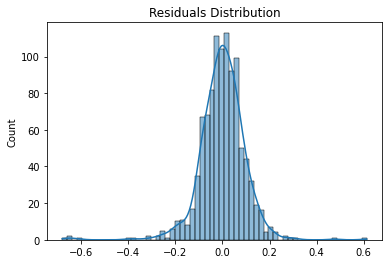

In [33]:
# Plot histogram of residuals using histplot
sns.histplot(y_train - y_pred_lasso_train, kde=True)  # kde=True adds a kernel density estimate
plt.title('Residuals Distribution')
plt.show()

## 3. Ridge Regression

In [34]:
# Applying Ridge
ridge = Ridge()

# Cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True, verbose = 1)    

model_cv.fit(X_train, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [35]:
# Get the best model and results
print("Best cross-validation score: ", model_cv.best_score_)
print("Best parameters: ", model_cv.best_params_)

Best cross-validation score:  -0.09648777606802601
Best parameters:  {'alpha': 2.0}


### --- Model Fit

In [36]:
# Ridge Model for best param
ridge = Ridge(alpha=model_cv.best_params_['alpha'])
ridge.fit(X_train, y_train)

y_pred_ridge_train=ridge.predict(X_train)
print('Train R2 Square : ', round(r2_score(y_train, y_pred_ridge_train),2))

y_pred_ridge_test=ridge.predict(X_test)
print('Test R2 Square : ', round(r2_score(y_test, y_pred_ridge_test),2))

Train R2 Square :  0.95
Test R2 Square :  0.83


#### -- Model Parameters

In [37]:
#  Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df.columns
cols = cols.insert(0, "constant")
var_coeff = [x for x in list(zip(cols, model_parameters)) if abs(x[-1] != 0)]
ridge_params = pd.DataFrame({'Feature':list(list(zip(*var_coeff))[0]),'Coeff':list(list(zip(*var_coeff))[1])})
ridge_params.reindex(ridge_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
0,constant,12.023
107,RoofStyle_Mansard,0.284
110,RoofMatl_Metal,0.189
112,RoofMatl_Tar&Grv,0.141
111,RoofMatl_Roll,0.125
39,MSZoning_FV,0.109
40,MSZoning_RH,0.088
37,SalePrice,0.064
4,OverallQual,0.063
16,GrLivArea,0.060


#### -- Residual Analysis

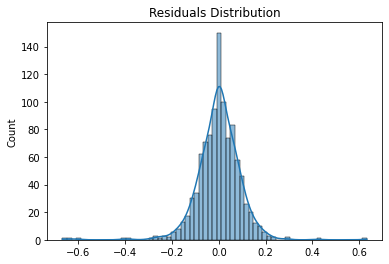

In [38]:
# Plot histogram of residuals using histplot
sns.histplot(y_train - y_pred_ridge_train, kde=True)  # kde=True adds a kernel density estimate
plt.title('Residuals Distribution')
plt.show()

_________________________

## 1. Ridge Model
#####  Train R2 Square :  0.95
##### Test R2 Square :  0.83

## 2. Lasso Model
##### Train R2 Square :  0.94
##### Test R2 Square :  0.86

## 3. MLR Model 
##### Train R2 Square :  0.95
##### Test R2 Square :  0.86

### Lasso seems to be the best model for generalization.

_________________________

# Task

### 1. Identify Significant Variables:
Based on the coefficients provided by Lasso, here are some of the most significant variables:
- **RoofStyle_Mansard (0.212)**: A large positive coefficient indicates that the Mansard Roof Style is positively correlated with house prices. This feature significantly impacts the price.
- **GrLivArea (0.112)**: The above-ground living area (GrLivArea) is positively correlated with house prices, and its relatively high coefficient value indicates it's an important predictor.
- **OverallQual (0.074)**: Overall quality of the house also has a positive relationship with house price, making it an important factor.
- **YearBuilt (0.052)**: The year the house was built has a moderate positive effect on house prices.
- **RoofMatl_Metal (0.144)**: The metal roof material has a positive impact on house prices.
- **RoofMatl_Tar&Grv (0.107)** and **RoofMatl_Roll (0.093)**: These are also positively related to house prices, though with smaller coefficients than RoofMatl_Metal.
- Variables like **BsmtQual_Gd (-0.021)**, **KitchenQual_Fa (-0.021)**, and **Neighborhood_NWAmes (0.023)** have smaller coefficients but still might be of interest.

### 2. Assess Model Performance:
The Lasso model has an **R²** of **0.86** on the test set, which is a good indication that the **model explains 86% of the variation in house prices**. The significant variables identified above contribute to this performance. The model seems to have captured key features that explain house prices but might be slightly overfitting, as evidenced by the lower test R² compared to the training R².

### 3. Optimize Lambda Values:
- The optimal lambda for Lasso : 0.001
- The optimal lambda for Ridge : 2.0

__________________
_________________________

# Summary
1. Significant Variables:
Key variables with significant coefficients: **RoofStyle_Mansard, GrLivArea, OverallQual, RoofMatl_Metal, RoofMatl_Tar&Grv, RoofMatl_Roll**, and **YearBuilt**. These have large coefficients and significantly impact house prices.

2. Model Performance:
The Lasso model has an **R²** of **0.86** on the test set, explaining **86%** of the variance in house prices. The model fits the training data well, but there's some drop in performance on the test set (indicating possible overfitting).

3. Optimize Lambda Values:
The optimal lambda for **Lasso is 0.001** and **Ridge 2.0**.

<div class="alert alert-block alert-success">
<b>END</b>
</div>